<a href="https://colab.research.google.com/github/GabaAraujo/Python_IA/blob/main/Classifica%C3%A7%C3%A3o%20de%20Motores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)
# Importando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

2.13.0


In [ ]:
# Carrega conjunto de dados
dados = pd.read_csv('/content/Materiais_Treinamento.txt')
# Ver dados
dados.head()


,Limite de Escoamento (MPa),Limite de Resistência (MPa),Tensão de ruptura (MPa),Tipo de Material (Dúctil ou Frágil)
0,146,161,157,Dúctil
1,71,87,102,Dúctil
2,99,114,126,Dúctil
3,90,110,93,Dúctil
4,134,146,170,Dúctil


In [ ]:
# Divide em Entrada e Resposta
X1 = dados.iloc[:,0:4] #Entrada
X1

,Limite de Escoamento (MPa),Limite de Resistência (MPa),Tensão de ruptura (MPa),Tipo de Material (Dúctil ou Frágil)
0,146,161,157,Dúctil
1,71,87,102,Dúctil
2,99,114,126,Dúctil
3,90,110,93,Dúctil
4,134,146,170,Dúctil
5,108,122,115,Dúctil
6,60,74,89,Dúctil
7,125,138,163,Dúctil
8,102,117,136,Dúctil
9,65,79,98,Dúctil


In [ ]:
X = X1.values
X
# Altera os dados para números
for i in range(len(X)):
  if X[i][3] == "Dúctil":
    X[i][3] = 0
  if X[i][3] == "Frágil":
    X[i][3] = 1

X
XX = pd.DataFrame(data=X,columns=X1.columns)
XX.head()


# Normnaliza os dados
scaler = StandardScaler()
XX = scaler.fit_transform(XX)
XX






array([[ 1.76688147,  1.84037027,  1.27707735, -0.93094934],
       [-1.21579625, -0.89510118, -0.72669149, -0.93094934],
       [-0.10226324,  0.10297624,  0.14768037, -0.93094934],
       [-0.46018456, -0.04488708, -1.05458094, -0.93094934],
       [ 1.28965304,  1.28588282,  1.75069545, -0.93094934],
       [ 0.25565809,  0.39870289, -0.2530734 , -0.93094934],
       [-1.65325565, -1.37565697, -1.20030959, -0.93094934],
       [ 0.93173171,  0.99015617,  1.49567032, -0.93094934],
       [ 0.01704387,  0.21387373,  0.51200198, -0.93094934],
       [-1.45441047, -1.19082782, -0.87242014, -0.93094934],
       [-0.53972264, -0.37757955,  0.03838388, -0.93094934],
       [-0.18180131, -0.00792125,  0.18411253, -0.93094934],
       [ 1.40896014,  1.54464363,  0.80345926, -0.93094934],
       [ 1.249884  ,  1.43374614,  0.5848663 , -0.93094934],
       [ 0.69311749,  0.91622451,  0.43913765, -0.93094934],
       [ 1.17034593,  1.43374614,  0.87632358, -0.93094934],
       [-1.33510336, -0.

In [ ]:
Y1 = dados.iloc[:,3] #Resposta
Y = Y1.values
Y

for i in range(len(Y)):
  if Y[i] == "Dúctil":
   Y[i] = 1
  if Y[i] == "Frágil":
   Y[i] = 0
  Y
# Transforma os dados
  Y2 = []
  for i in range(len(Y)):
    linha = []
    for j in range(3):
     if (j+1) == Y[i]:
      linha += [1]
    else:
      linha += [0]
    Y2.append(linha)


  YY = pd.DataFrame(data=Y2,columns=['Tipo01', 'Tipo02'])
# Ver Y
YY.head()

,Tipo01,Tipo02
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: nan - accuracy: 1.0000
Epoch 5508/8000
1/1 [==============================] - 0s 11ms/step - loss: nan - accuracy: 1.0000
Epoch 5509/8000
1/1 [==============================] - 0s 11ms/step - loss: nan - accuracy: 1.0000
Epoch 5510/8000
1/1 [==============================] - 0s 11ms/step - loss: nan - accuracy: 1.0000
Epoch 5511/8000
1/1 [==============================] - 0s 11ms/step - loss: nan - accuracy: 1.0000
Epoch 5512/8000
1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 1.0000
Epoch 5513/8000
1/1 [==============================] - 0s 16ms/step - loss: nan - accuracy: 1.0000
Epoch 5514/8000
1/1 [==============================] - 0s 21ms/step - loss: nan - accuracy: 1.0000
Epoch 5515/8000
1/1 [==============================] - 0s 17ms/step - loss: nan - accuracy: 1.0000
Epoch 5516/8000
1/1 [==============================] - 0s 14ms/step - loss

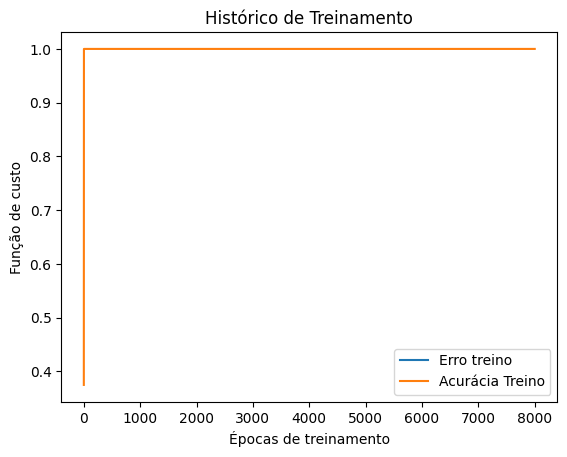

IndexError: ignored

In [ ]:

# Define o Modelo
modelo = Sequential()
modelo.add(Dense(4, input_dim=4, activation='relu'))
# modelo.add(Dense(28, activation='relu'))
# modelo.add(Dense(14, activation='relu'))
modelo.add(Dense(2, activation='sigmoid'))

# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treina o Modelo
resultado = modelo.fit(XX, YY, batch_size = 900, epochs = 8000)









# Mostra a rede
modelo.summary()




# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()
















# Carrega conjunto de teste
testes = pd.read_csv('/content/Materiais_Teste.txt')

# Ver testes
testes.head()









# Divide em Entrada
Xtestes1 = testes.iloc[:,0:3] #Entrada

# Ver os testes
Xtestes1


Xt = Xtestes1.values
Xt

for i in range(len(Xt)):
 if Xt[i][3] == "Dúctil":
    Xt[i][3] = 0
 if Xt[i][3] == "Frágil":
    Xt[i][3] = 1


Xt







Xtestes = pd.DataFrame(data=Xt,columns=testes.columns)


# Normaliza os dados de teste
Xtestes = scaler.fit_transform(Xtestes)
Xtestes





# Testa a rede
Y_predito = modelo.predict(Xtestes)
print("Valores Preditos:",Y_predito)








Y_predito1 = np.array([])
Yr = np.array([])
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))
    for j in range(len(Y_parte)):
      if Y_parte[j]==1:
        Resp = ([j+1])

    Yr = np.concatenate((Yr,Resp))


Yr




YYr = np.array([])
for i in range(len(Yr)):
  if Yr[i] == "Dúctil":
    r = "1"
  if Yr[i] == "Frágil":
    r = "0"


  YYr = np.concatenate((YYr,[r]))

YYr







# Ver Resposta
Y_Resposta = pd.DataFrame(data=YYr, columns=['Ductil ou Fragil'])
Y_Resposta










Y_predito1 = Y_predito1.reshape(Y_predito.shape[0], Y_predito.shape[1])
print("Valores Preditos:",Y_predito1)


Ytestes = pd.DataFrame(data=Y_predito1, dtype=np.int8, columns=['Tipo01', 'Tipo02'])

# Ver Y
Ytestes.head()







# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')













